# Mathematical Underpinnings - Lab 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

Y = X + eps
E[(aX-Y)**2] = E[a**2X**2 - 2aXY + Y**2] = E[a**2X**2] - 2aE[X(X+eps)] + E[(X+eps)**2] = a**2 * 1 - 2a * 1 + 1 + sigma**2 

In [12]:
def population_risk(a, sigma_eps):
    return a**2 - 2*a + 1 + sigma_eps**2

### b)

In [43]:
def get_data(n, sigma):
    X = np.random.normal(0, 1, n)
    eps = np.random.normal(0, sigma, n)
    Y = X + eps
    return X, Y

In [3]:
n = 50
sigma = 1
X = np.random.normal(0, 1, n)
eps = np.random.normal(0, sigma, n)
Y = X + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [4]:
def empirical_risk(a, x, y):
    return np.mean((a * x - y)**2)

In [7]:
empirical_risk(3, X, Y)

3.8780554019594558

### c)

In [15]:
# argmin of population risk a = 1 (derivatives)
population_risk(1, sigma)

1

In [21]:
# best empirical risk
a = np.linspace(-2, 4, 1000)
best_risk = 1e10
for a_i in a:
    risk = empirical_risk(a_i, X, Y)
    if risk < best_risk:
        best_risk = risk
        best_a = a_i
best_risk, best_a

(0.8790306346142893, 1.159159159159159)

In [27]:
best_pop_risk = population_risk(best_a, sigma)
best_pop_risk

1.0253316379442505

In [32]:
a = np.linspace(0, 2, 1000)
risk = [empirical_risk(a_i, X, Y) for a_i in a]
pop_risk = population_risk(a, sigma)

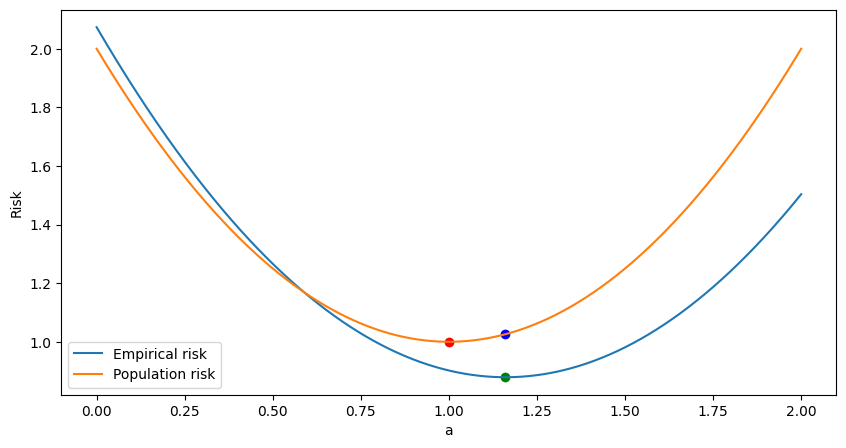

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(a, risk, label='Empirical risk')
plt.plot(a, pop_risk, label='Population risk')
plt.xlabel('a')
plt.ylabel('Risk')
plt.scatter(1, 1, color='red')
plt.scatter(best_a, best_risk, color='green')
plt.scatter(best_a, best_pop_risk, color='blue')
plt.legend()
plt.show()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [54]:
# simulations with fixed sample size
L = 200
scores = []
for i in range(L):
    X, Y = get_data(n, sigma)
    a = np.linspace(-2, 4, 1000)
    best_risk = 1e10
    for a_i in a:
        risk = empirical_risk(a_i, X, Y)
        if risk < best_risk:
            best_risk = risk
            best_a = a_i
    best_pop_risk = population_risk(best_a, sigma)
    scores.append(best_pop_risk - population_risk(1, sigma))

In [55]:
np.mean(scores), np.std(scores)

(0.018678498318137938, 0.03172587347456535)

In [59]:
import tqdm

In [63]:
# simulations for various sample sizes
# simulations with fixed sample size
L = 200
scores_final = []
for n in tqdm.tqdm([50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]):
    scores = []
    for i in range(L):
        X, Y = get_data(n, sigma)
        a = np.linspace(-2, 4, 1000)
        best_risk = 1e10
        for a_i in a:
            risk = empirical_risk(a_i, X, Y)
            if risk < best_risk:
                best_risk = risk
                best_a = a_i
        best_pop_risk = population_risk(best_a, sigma)
        scores.append(best_pop_risk - population_risk(1, sigma))
    scores_final.append(scores)

100%|██████████| 11/11 [00:27<00:00,  2.51s/it]


In [64]:
means = [np.mean(scores) for scores in scores_final]
stds = [np.std(scores) for scores in scores_final]

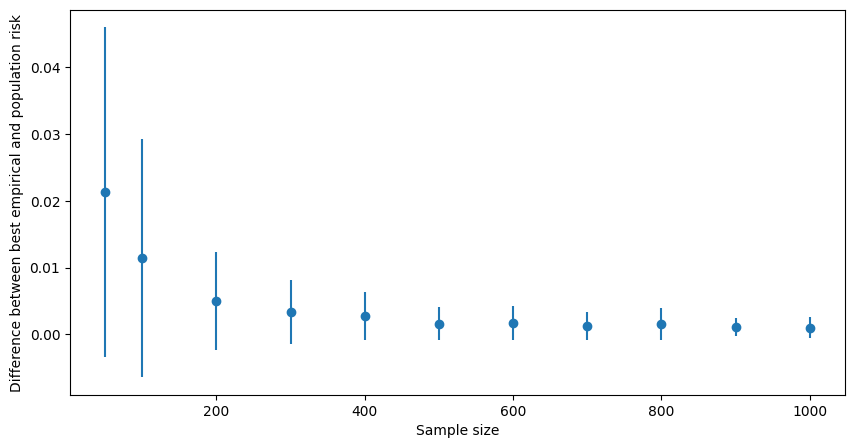

In [66]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
plt.figure(figsize=(10, 5))
plt.errorbar([50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], means, yerr=stds, fmt='o')
plt.xlabel('Sample size')
plt.ylabel('Difference between best empirical and population risk')
plt.show()